In [19]:
#앙상블 - 여러 머신러닝 모델 연결 해 더 강력한 모델을 만든다!
#약분류기를 결합해 강분류기를 만든다...
#배깅, 부스팅 으로 나눌 수 있다. 
#배깅 - 부트스트랩 aggregation
#부스팅 - 가중치 활용, 약분류기를 강분으로 만듬  
#랜덤 포레스트 프로세스 -> 우선 결정트리 많이 만들기. 트리생성에 무작위성 주입. -> 각 트리가 고유하게 만들어지게 무작위 선택 (bootstrap sample) -> 무작위로 선택 후 후보 중 최선의 테스트도출 ->max feature가 나옴
# max feature 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()

In [23]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [24]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [25]:
X = iris.data
y = iris.target

In [27]:
df = pd.DataFrame(X,columns = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'])

In [28]:
df.head()

,sepal_width(cm),sepal_length(cm),petal_width(cm),petal_length(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
#70프로를 트레이닝 셋, 그리고 30프로를 테스트 셋

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_estimators = 100)
#estimator : 랜덤 포레스트 안에 만들어지는 의사결정 나무의 갯수 의미

In [36]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9777777777777777


In [41]:
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)

In [42]:
feature_imp

petal width (cm)     0.449031
petal length (cm)    0.419666
sepal length (cm)    0.084397
sepal width (cm)     0.046906
dtype: float64

In [43]:
#sort_values 는 데이터 feature들 정렬

In [44]:
import matplotlib.pyplot as plt


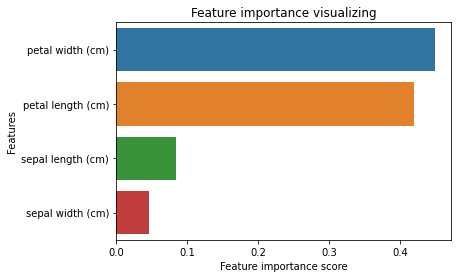

In [47]:
sns.barplot(x=feature_imp, y= feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Feature importance visualizing')

plt.show()